<a href="https://colab.research.google.com/github/ByronTraconis/Working/blob/main/Steam_Reviews_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steam Reviews Dataset

### Descricpión del proyecto

Para este proyecto tenemos un dataset, el cual se describirá acontinuación:


<ul>
    <li><code>steam_reviews.csv</code>: Estos datos contienen reseñas de los juegos más vendidos de Steam a fecha de febrero de 2019.</li>

</ul>

## Cargar liberías

En primera instancia instalamos las librerías necesarias para la correcta ejecución del programa. Posteriormente, las cargamos en el ambiente.

In [ ]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

## Limpieza y exploración de los datos

- Lo primero que vamos a hacer es cargar nuestros datos en la variable **steam_data**. 


In [ ]:
#Asignación de los datos a la variable.
steam_data = pd.read_csv("https://www.dl.dropboxusercontent.com/s/lp7f9h74ebwnf97/steam_reviews.csv?dl=0")

In [ ]:
#Imprimir el número total de juegos
print("El número total de juegos reseñados en el dataset es de:", len(steam_data["title"].unique()))

#Imprimir cuales son esos juegos
juegos = steam_data["title"].unique()
dic_juegos = {"Titulos": juegos}
data_set= pd.DataFrame(dic_juegos)
data_set.head(len(steam_data["title"].unique()))

El número total de juegos reseñados en el dataset es de: 48


,Titulos
0,Expansion - Hearts of Iron IV: Man the Guns
1,Dead by Daylight
2,Wargroove
3,Wallpaper Engine
4,Factorio
5,Insurgency: Sandstorm
6,Cold Waters
7,Tannenberg
8,Pathfinder: Kingmaker
9,MONSTER HUNTER: WORLD


In [ ]:
#Observamos nuestro conjunto de datos
steam_data.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


## Descipción de nuestros datos


Realizamos un análisis de la estructura de la tabla, esto con el fin de observar que tipo de variables tenemos.

- Realizamos una observación de las dimensiones de nuestro DataSet.
- Observamos los datos  de nuestro DataSet.

In [ ]:
#Observamos las dimensiones de nuestro dataSet
print("Las dimensiones de nuestro DataSet tienen : " + str(steam_data.shape[0]) + " filas y " + str(steam_data.shape[1]) + " columnas.")

Las dimensiones de nuestro DataSet tienen : 434891 filas y 8 columnas.


In [ ]:
#Observamos un poco más a detalle que datos posee nuestro DataSet
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434891 entries, 0 to 434890
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   date_posted             434891 non-null  object
 1   funny                   434891 non-null  int64 
 2   helpful                 434891 non-null  int64 
 3   hour_played             434891 non-null  int64 
 4   is_early_access_review  434891 non-null  bool  
 5   recommendation          434891 non-null  object
 6   review                  433375 non-null  object
 7   title                   434891 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 23.6+ MB


Podemos observar que en nuestro conjunto de datos, **3** de estos son **Enteros**, **4** de los datos son de tipos **Cadena** y el dato restante es **Booleano**

Con respecto a lo anterior, sabemos que cada uno de estos tipos de datos corresponde a:


- **date_posted:** La fecha de publicación de una reseña.

- **funny:** Cuántos otros jugadores piensan que la crítica es divertida.

- **helpful:** Cuántos otros jugadores piensan que la revisión es útil.

- **hour_played:** Cuántas horas juega un crítico al juego antes de hacer una crítica.

- **is_early_access_review:** Indica si los jugaores tuvieron acceso anticipado al juego.

- **recommendation:** Si el crítico recomienda el juego o no.

- **review:** El texto de la revisión del usuario.

- **title:** El título del juego que se está revisando.


## Estadísticas del DataFrame


d

In [ ]:
#Sacar las los juegos
categorias = steam_data.groupby("title")["title"].unique()

#Sacar el número de reseñas por juego
reviews= steam_data.groupby("title").agg({'review': 'count'})

#Renombrar 

In [ ]:
reviews.head(len(steam_data["title"].unique()))

,review
title,
ACE COMBAT™ 7: SKIES UNKNOWN,10
ARK: Survival Evolved,194
ASTRONEER,2658
Battlefleet Gothic: Armada 2,10
Beat Saber,10
Cold Waters,10
Dead by Daylight,22178
Divinity: Original Sin 2 - Definitive Edition,190
Don't Starve Together,165


## Exploración por medio de gráficos.




Vamos a explorar nuestros gráficos con un diagrama en SnS.

Para esto vamos a realizar una segmentación de nuestras características a analizar, en este caso tomaremos:

<Figure size 864x720 with 0 Axes>

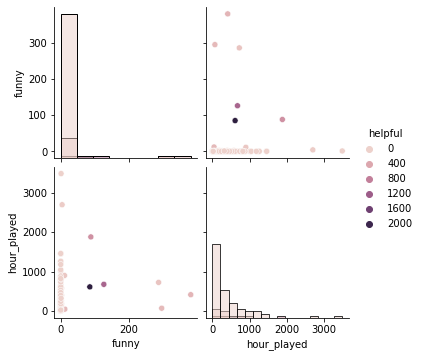

In [ ]:
segmento = ["funny",	"helpful",	"hour_played"]


fig = plt.figure(figsize=(12,10))
sns.pairplot(steam_data[segmento][0:100], hue="helpful" , diag_kind = "hist")

plt.show()

In [ ]:
#Comprobación de la existencia de NaN's en nuestra tabla
#Comprobamos que ya no existan NaN's

Nan = steam_data[steam_data.isna().any(axis=1)]
#print(Nan)

#Como en la tabla existen NaN´s los vamos a eliminar
steam_data = steam_data.fillna(0)

In [ ]:
#Comprobamos que ya no existan NaN's

Nan = steam_data[steam_data.isna().any(axis=1)]
print(Nan)

Empty DataFrame
Columns: [date_posted, funny, helpful, hour_played, is_early_access_review, recommendation, review, title]
Index: []


# Clasificación por medio de T-sne

In [ ]:
#Convertimos las "recomendaciones" en una variable booleana.

steam_data.loc[steam_data["recommendation"] == "Recommended", "recommendation"] = 1
steam_data.loc[steam_data["recommendation"] == "Not Recommended", "recommendation"] = 0

steam_data["recommendation"] = steam_data["recommendation"].astype("float64")

In [ ]:
#Ahora vamos a agrupar los datos cercanos y separar los datos diferentes por medio de TSNE.

#Quitamos los datos no númericoas del dataset
no_numeri = ["date_posted", "review", "title","is_early_access_review"]

set_numerico = steam_data[0:100].drop(no_numeri, axis=1)

print("Las dimensiones de nuestro DataSet tienen : " + str(set_numerico.shape[0]) + " filas y " + str(set_numerico.shape[1]) + " columnas.")

Las dimensiones de nuestro DataSet tienen : 100 filas y 4 columnas.


In [ ]:
#Procedemos a crear un modelo t-SNE con un aprendizaje de 50

m = TSNE(learning_rate = 50)

# Ajuste y transformación del modelo t-SNE en el conjunto de datos numéricos
tsne_features = m.fit_transform(set_numerico)
#print(tsne_features.shape)
print("Después del TSNE las dimensiones de nuestro DataSet tienen : " + str(tsne_features.shape[0]) + " filas y " + str(tsne_features.shape[1]) + " columnas.")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


Después del TSNE las dimensiones de nuestro DataSet tienen : 100 filas y 2 columnas.


In [ ]:
#Verificamos que demonios quedó como las dos columnas restantes

print(tsne_features[:, 0 ]) #<---- Para las X
print(tsne_features[:, 1 ]) #<---- Para las Y

[ 2.325645    4.629101    1.224278    0.2612124   0.0628176  -0.5501049
  7.277162    7.4938254   2.8615026   0.7160624   0.9614286  -0.13874592
  0.90339494  4.182173    1.9900353   2.6843503  -0.64645505  0.45304403
  2.8049972   4.234369    0.44371712  6.16679     4.0576057   2.4721057
  4.691583    5.50797     5.7200274   5.523687    3.8642454   5.121405
  5.482132    4.6542096   1.4880066   6.161672    4.279893    1.2638956
  1.0105191   4.733615    0.69315284  3.2100577   3.3012123   4.500983
  5.6095376   4.6867847   5.080566    5.9510045   1.481175    4.3714137
  2.260096    0.71413827  3.4651372   3.7740142   6.3748555   3.4073088
  6.2493405   3.9863772   5.740095    3.436104    4.17469     3.0914116
  5.900046    2.177809    5.4246025   4.9737773   4.9975643   3.6791399
  1.673987    4.9131036   6.3883386   3.989337    5.615851    0.67730033
  5.43996     5.911935    2.5775428   5.4864783   4.205994    4.955314
  1.4291525   3.7507591   4.6512537   4.9250865   2.8773334   4.

In [ ]:
#Asignamos las columnas resultantes del proceso anterior a las variables X y Y

x = tsne_features[:, 0 ]
y = tsne_features[:, 1 ]

steam_data = steam_data[0:100]
#Le agregamos las dos columnas a nuestro DatSet

steam_data["x"] = x

steam_data["y"] = y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
#verificamos que se hayan agregado
steam_data.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,x,y
0,2019-02-10,2,4,578,False,1.0,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns,2.325645,4.239463
1,2019-02-10,0,0,184,False,1.0,yes.,Expansion - Hearts of Iron IV: Man the Guns,4.629101,-1.112198
2,2019-02-07,0,0,892,False,1.0,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns,1.224278,5.700488
3,2018-06-14,126,1086,676,False,1.0,Out of all the reviews I wrote This one is pro...,Dead by Daylight,0.261212,2.365758
4,2017-06-20,85,2139,612,False,1.0,Disclaimer I survivor main. I play games for f...,Dead by Daylight,0.062818,2.156799


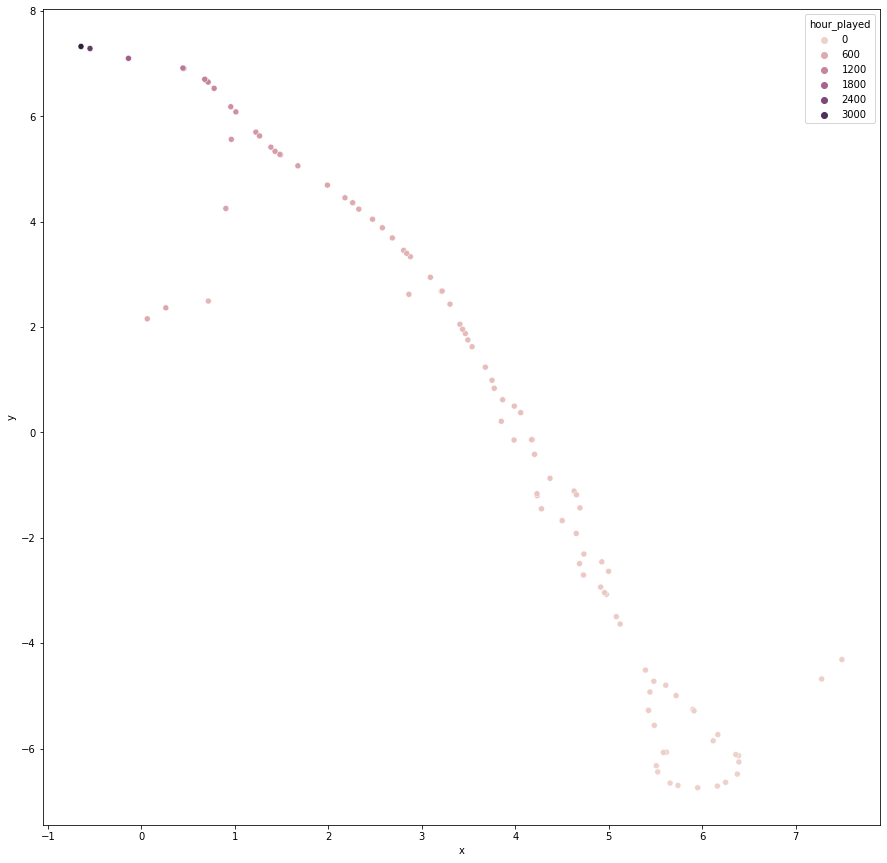

In [ ]:
#Ahora si, procedemos a verificar nuestros datos de manera visual

#Construimos un scatterplot
fig = plt.figure(figsize =(15,15))
sns.scatterplot(x="x", y="y", hue='hour_played', data=steam_data)

plt.show()

#Construcción de un modelo

In [ ]:
#Se selecciona la variable a predecir 
y = set_numerico["recommendation"]

#Removemos la varible predictora del conjunto de datos
X = set_numerico.drop("recommendation" , axis = 1)


#Contruimos el conjunto para los datos 70% de entrenamiento y 30% de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} filas en el conjunto de prueba vs. {} en el conjunto de entrenamiento. {} Características.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

30 filas en el conjunto de prueba vs. 70 en el conjunto de entrenamiento. 3 Características.


In [ ]:
#Entrenamiento de los datos

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} exactitud en el conjunto de prueba vs. {1:.1%} en el conjunto de entrenamiento".format(accuracy_test, accuracy_train))

86.7% exactitud en el conjunto de prueba vs. 88.6% en el conjunto de entrenamiento


In [ ]:
#Quitamos x e y
tirar = ["x","y"]
steam_data = steam_data.drop(tirar, axis=1)

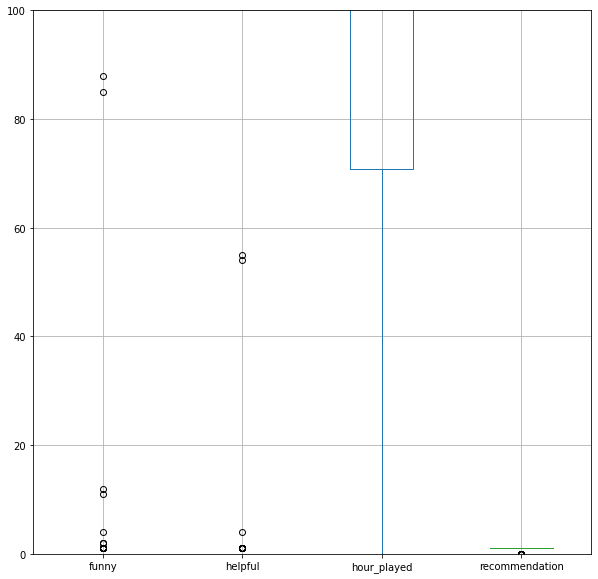

In [ ]:
#Encontrar un buen umbral de varianza ¯\_(ツ)_/¯

#Para ello construimos un boxplot y vemos que tan dispersos están nuestros datos

fig = plt.figure(figsize =(10,10))

set_numerico.boxplot()
plt.ylim(0,100)
plt.show()

#Resumen, mucho

In [ ]:
# Imprimimos las varianzas de los datos antes de normalizar
print(set_numerico.var())

funny               3306.978889
helpful            61579.303030
hour_played       300347.658182
recommendation         0.106667
dtype: float64


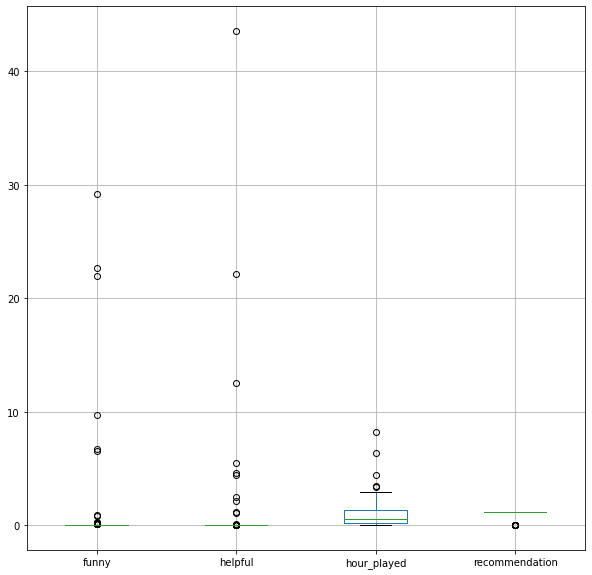

In [ ]:
# Normalizamos los datos 

fig = plt.figure(figsize =(10,10))
normalized_df = set_numerico / set_numerico.mean()

normalized_df.boxplot()
plt.show()

In [ ]:
# Imprimimos las varianzas de los datos ya normalizados
print(normalized_df.var())

funny             19.477921
helpful           25.542993
hour_played        1.657205
recommendation     0.137741
dtype: float64


In [ ]:
# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.1)

# Fit the selector to normalized head_df
sel.fit(normalized_df / normalized_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = normalized_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(normalized_df.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 4 to 4.


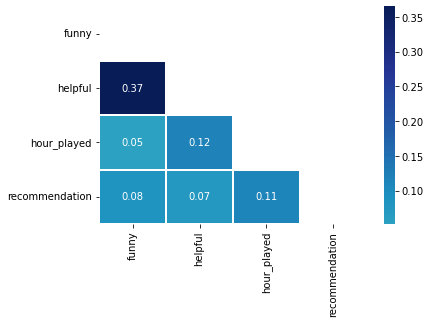

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap="YlGnBu", center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()


# Clasificación por medio de PCA